### Task
Develop a system that can take the given images and perform the following tasks:
-separate coins from the background.
-Create a method that takes the value of coin eg 5/10/20 and outputs the given coins only!

(Use of Open CV is prohibited!)

Output:
Call a single function with one value and it should output the coins of that value

In [2]:
# import the required packages 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import skimage.morphology as sk
from scipy import ndimage
from skimage.morphology import disk

In [3]:
# disk for later use (in dilation and erosion processes)
s_elem = np.ones((3, 3))

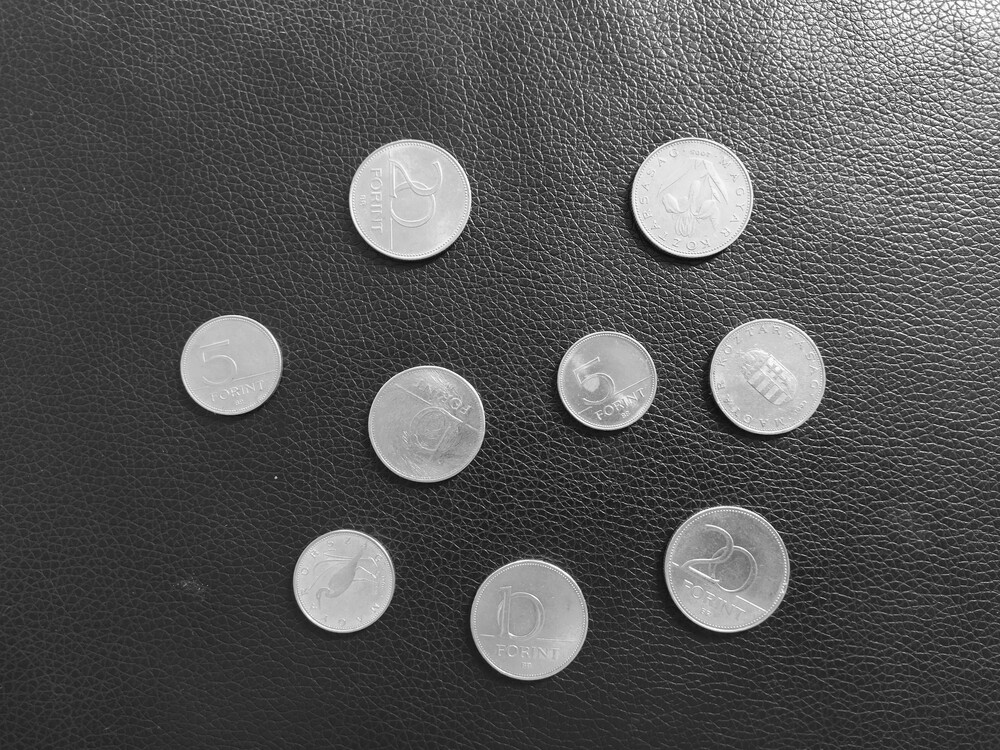

In [4]:
# Open the rgb picture as an orginal image 
original_img = Image.open('coin_1_1000x750.jpg')
# Create the grayscale image for mask
img_rgb = original_img.convert('L')
# Covert the image to a numpy array for easier manipulation
img_rgb_arr = np.array(img_rgb)
img_rgb

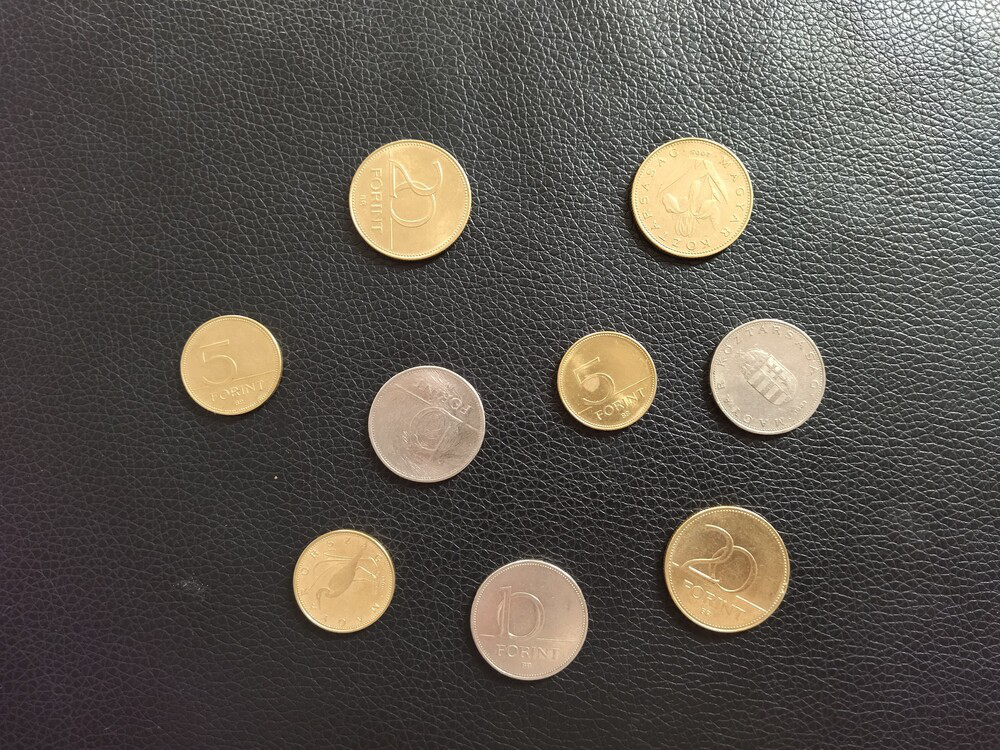

In [5]:
#comparing grayscale img with original
original_img

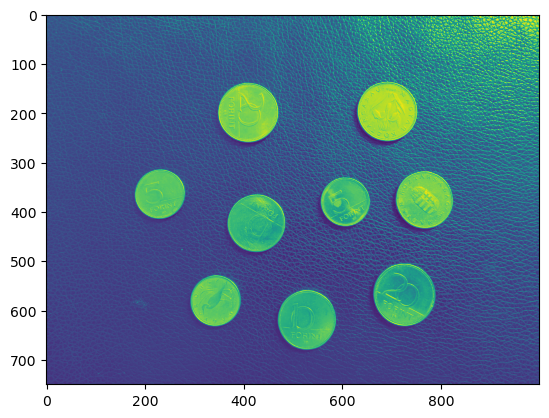

In [6]:
plt.imshow(img_rgb_arr)

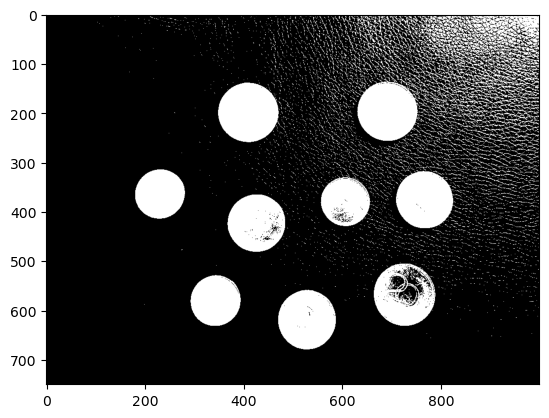

In [7]:
# Creating binary image for mask
coins = img_rgb_arr > 140
plt.imshow(coins,'gray')

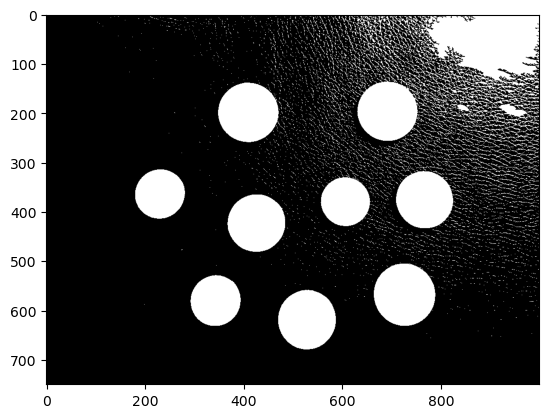

In [8]:
filled = ndimage.binary_fill_holes(coins) # filled holes inside the coins basically repairing the mask
plt.imshow(ndimage.binary_fill_holes(filled),'gray')

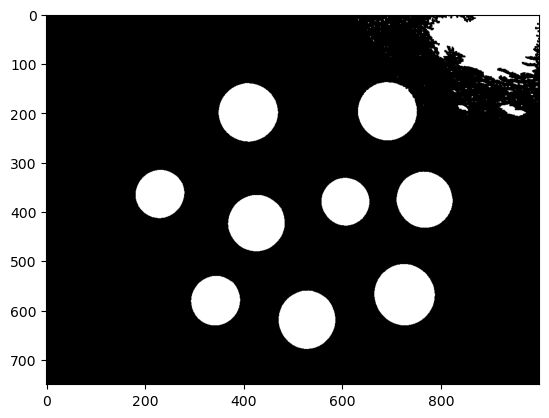

In [9]:
# removed the leather texture from the image using erosion
closeCoin2 = sk.binary_erosion(filled,s_elem)
plt.imshow(closeCoin2,'gray')

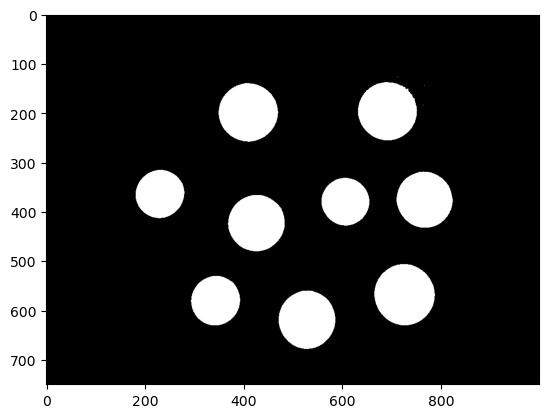

In [10]:
# statically removed noise from the upper right portion of the image
closeCoin2[0:100,550:] = 0
closeCoin2[0:250,800:] = 0
plt.imshow(closeCoin2,'gray')

In [31]:
# clearing some extra tiny holes in the background
closeCoin2 = sk.binary_opening(closeCoin2,s_elem)

In [32]:
# get labels from the mask so we can crop them from original image
labels, obj_count = ndimage.label(closeCoin2)

In [33]:
# check the object count
print(obj_count)

9


In [34]:
# function that covert 2d binary image to 3D black white image
def to_3d(labels):
    base = np.zeros([labels.shape[0], labels.shape[1], 3])
    for i in range(3):
        base[:,:,i] = labels.astype(bool)
    return base.astype(np.uint8)

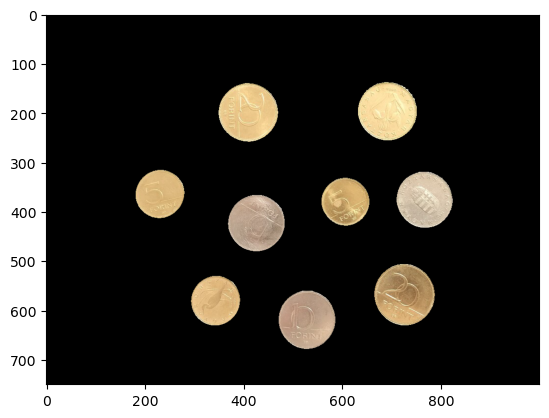

In [35]:
# masking the rgb image with previously created mask
plt.imshow(original_img*to_3d(labels), 'gray')

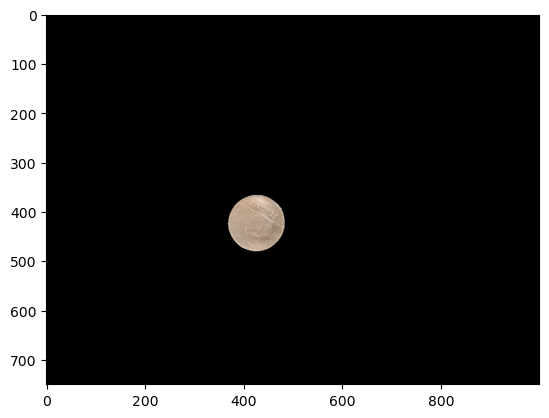

In [36]:
# Tried if i can show the specific coin in the image
plt.imshow(original_img*to_3d(labels == 6), 'gray')

In [37]:
# practice
original_img.size[0]

1000

In [38]:
# trying to find area of a single coin
labeled_image = labels == 6
Coin_area = ndimage.sum(np.ones_like(labeled_image), labeled_image, range(1, np.max(labeled_image) + 1))

In [39]:
(labels==6).shape # checing the dimension of the coin

(750, 1000)

In [40]:
print(Coin_area)

[10248.]


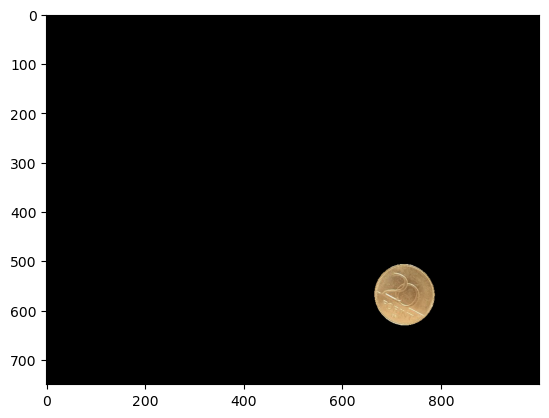

In [41]:
# practicing different things for the next function  
blackimage = np.zeros((original_img.size[1], original_img.size[0], 3), dtype=np.uint8)
blackimage  += to_3d(labels == 7) * original_img
plt.imshow(blackimage)

In [42]:
# simple function that returns the area of coin
def coinArea(labeled_image):
    return ndimage.sum(np.ones_like(labeled_image), labeled_image, range(1, np.max(labeled_image) + 1))
# function that can print specific coin from the pictire based on the input coin value.
# basically function creates a plain black image which is the same size as the original image
# then separates the labels based on the area of the label. I calculated label areas manually. 
# if the label area matches the criteria it modifies the black image with the specific mask
# At the end it returns the midified mask
def printThisCoin(coinAmount):
    blackimage = np.zeros((original_img.size[1], original_img.size[0], 3), dtype=np.uint8)
    start = 1
    while start <= obj_count:
        if coinAmount == 20 and coinArea(labels == start) > 11000:
            blackimage  += to_3d(labels == start) * original_img
        elif coinAmount == 10 and 10000 < coinArea(labels == start) < 11000:
            blackimage  += to_3d(labels == start) * original_img
        elif coinAmount == 5 and 6000 < coinArea(labels == start) < 9000:
            blackimage  += to_3d(labels == start) * original_img
        start += 1
    return blackimage
    
    

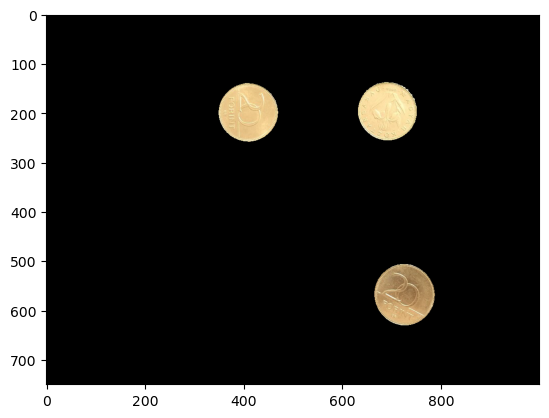

In [43]:
plt.imshow(printThisCoin(20)) # testing

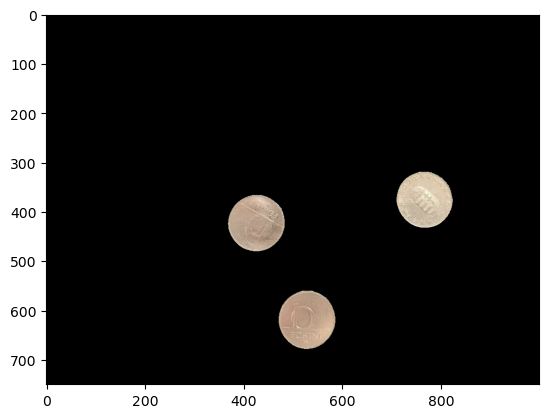

In [44]:
plt.imshow(printThisCoin(10)) # testing

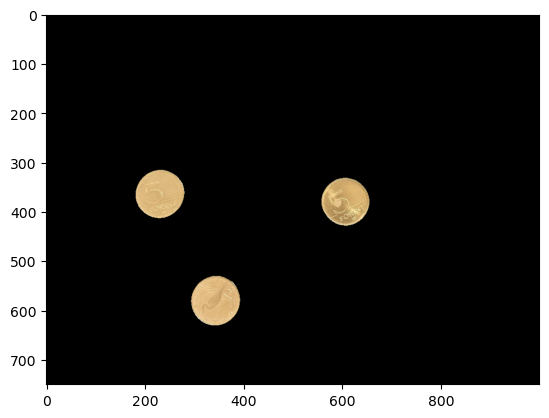

In [45]:
plt.imshow(printThisCoin(5)) # testing